In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv('heart[1].csv')

In [4]:
df1=df.copy()

In [5]:
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [11]:
df1.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [15]:
df1.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [17]:
label=LabelEncoder()

In [22]:
a=label.fit_transform(df1['Sex'])

In [23]:
df1['Sex']=a

In [24]:
b=label.fit_transform(df1['ChestPainType'])

In [25]:
df1['ChestPainType']=b

In [26]:
c=label.fit_transform(df1['RestingECG'])

In [27]:
df1['RestingECG']=c

In [28]:
d=label.fit_transform(df1['ExerciseAngina'])

In [29]:
df1['ExerciseAngina']=d

In [30]:
e=label.fit_transform(df1['ST_Slope'])

In [31]:
df1['ST_Slope']=e

In [32]:
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [33]:
x=df1.drop('HeartDisease',1)

C:\Users\aftha\AppData\Local\Temp\ipykernel_39692\1936637177.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=df1.drop('HeartDisease',1)


In [35]:
y=df1['HeartDisease']

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [41]:
models={'linear':LinearRegression(),'Logistic':LogisticRegression(),'Dtree':DecisionTreeClassifier(),'randf':RandomForestClassifier(),
        'knn':KNeighborsClassifier(),'GNB':GaussianNB(),'BNB':BernoulliNB(),'MNB':MultinomialNB()}

In [42]:
for i in models:
    model=models[i]
    scores=cross_val_score(model,x,y,cv=5)
    print(i,scores.mean())

linear 0.4133979321100618


C:\Users\aftha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aftha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic 0.8060822047992398
Dtree 0.7417379425041577
randf 0.8299952482775007
knn 0.6622297457828463
GNB 0.8311059634117367
BNB 0.7994832501781894
MNB nan


C:\Users\aftha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\aftha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\aftha\anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 690, in fit
    self._count(X, Y)
  File "C:\Users\aftha\anaconda3\lib\site-packages\sklearn\naive_bayes.py", line 863, in _count
    check_non_negative(X, "MultinomialNB (input X)")
  File "C:\Users\aftha\anaconda3\lib\site-package

In [43]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=.8,random_state=1)

In [47]:
GNB=GaussianNB()
GNB.fit(xtrain,ytrain)

GaussianNB()

In [48]:
GNB.score(xtest,ytest)

0.8913043478260869

In [51]:
GNB.predict([[68,1,0,144,193,1,1,141,0,3.4,1]])

C:\Users\aftha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [55]:
y_act=ytest
y_pred=GNB.predict(xtest)
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_act,y_pred)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

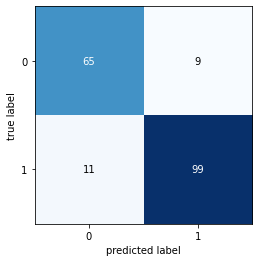

In [56]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(cf)